# Download images from Flickr using flickrapi package
* install *flickrapi*
~~~
pip install flickrapi
~~~
* get key, secret from Flickr

## query jason from flickr

In [66]:
from flickrapi import FlickrAPI
from pprint import pprint

FLICKR_KEY = "505e8c2b05e8b5aa51766a43fc4bc7a7"
FLICKR_SECRET = "46b3ef2f43b04ac6"

flickr = FlickrAPI(FLICKR_KEY, FLICKR_SECRET, format='parsed-json')
extras = 'url_o'
# url_sq, url_t, url_s, url_q, url_m, url_n, url_z, url_c, url_l, url_o

cats = flickr.photos.search(text='kitten', per_page=10, extras=extras)
photos = cats['photos']['photo']

photos_url = []
for pt in range(len(photos)):  
    if 'url_o' in photos[pt]:
        photos_url.append(photos[pt]['url_o'])
                      
pprint(photos_url)

['https://live.staticflickr.com/65535/48747826683_323acbc02a_o.jpg',
 'https://live.staticflickr.com/65535/48748111971_469d9a2d1d_o.jpg',
 'https://live.staticflickr.com/65535/48747697118_aaa41c207d_o.jpg',
 'https://live.staticflickr.com/65535/48747998142_1ed9532995_o.jpg',
 'https://live.staticflickr.com/65535/48747480533_c408df096e_o.jpg',
 'https://live.staticflickr.com/65535/48747997147_6ddca8b8c6_o.jpg',
 'https://live.staticflickr.com/65535/48747814111_8565dbe6fa_o.jpg']


## converer function from url to images

In [67]:
import numpy as np
import urllib
import cv2

# convert from url to image
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

## show images

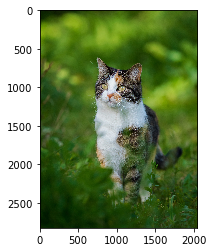

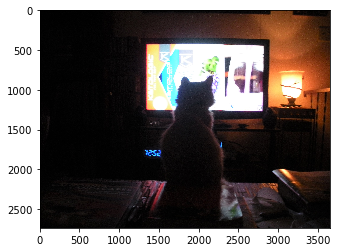

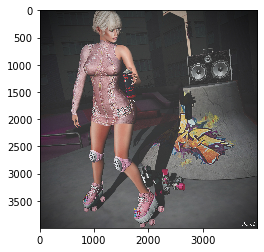

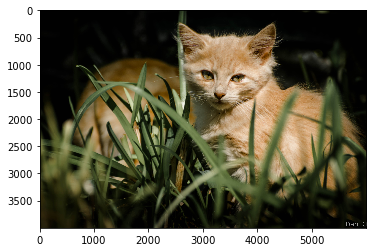

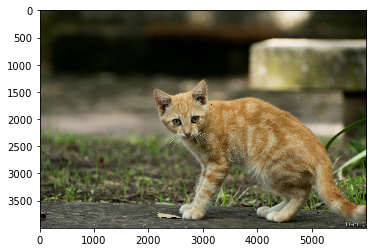

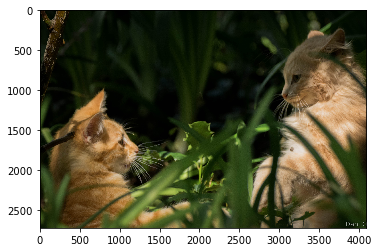

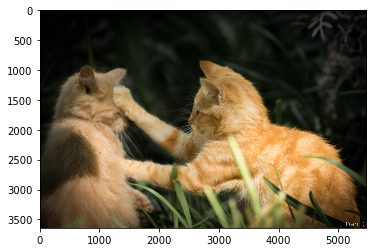

In [68]:
%matplotlib inline

from matplotlib import pyplot as plt 

image_list = []
for url in photos_url:
    img = url_to_image(url)
    image_list.append(img)
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## save image to local drive

In [71]:
# create folder
import os

current_path = os.getcwd()
new_path = current_path + "/flick_images"

if not os.path.exists(new_path) or not os.path.isdir(new_path):
    print("make folder: ", new_path)
    os.mkdir(new_path)

# save image to file
for i in range(len(image_list)):
    file_name = './flick_images/cats_{}.jpg'.format(i)
    print('write image -', file_name)
    cv2.imwrite(file_name, image_list[i])

write image - ./flick_images/cats_0.jpg
write image - ./flick_images/cats_1.jpg
write image - ./flick_images/cats_2.jpg
write image - ./flick_images/cats_3.jpg
write image - ./flick_images/cats_4.jpg
write image - ./flick_images/cats_5.jpg
write image - ./flick_images/cats_6.jpg


## resize image

In [74]:
def image_resize(image, x, y):
    img = cv2.resize(image, (x, y))
    return img
    
print(image_list[0].shape)
resized = image_resize(image_list[0], 244, 244)
print(resized.shape)

(2824, 2048, 3)
(244, 244, 3)


## Change Dimension in numpy

In [76]:
re_dim = np.expand_dims(resized, axis=0)
print(re_dim.shape)

(1, 244, 244, 3)


## Squeeze to display

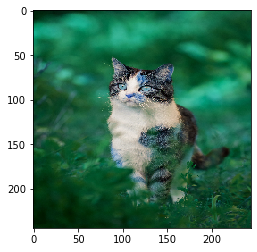

In [78]:
plt.imshow(np.squeeze(re_dim))